In [2]:
import networkx as nx
from collections import namedtuple
import numpy as np
from scipy.linalg import norm
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt
from typing import List, Union, Tuple

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def generate_random_geometric_graph(n, radius):
    G = nx.random_geometric_graph(n, radius)
    return G

def plot_graph(G, title):
    pos = nx.get_node_attributes(G, 'pos')
    nx.draw(G, pos, node_size=10, with_labels=False)
    plt.title(title)
    plt.show()

# Number of nodes
n = 10

# Different radii for different connectivity levels
# radii = [0.05, 0.1, 0.2, 0.3]
radius = 0.5
# for radius in radii:
G = generate_random_geometric_graph(n, radius)
plot_graph(G, f"Random Geometric Graph with radius {radius}")
# Step 1: Generate the adjacency matrix
A = nx.adjacency_matrix(G).toarray()

# Step 2: Generate the degree matrix (node matrix)
D = np.diag(A.sum(axis=1))

# Step 3: Compute the Laplacian matrix
L = D - A

print("Adjacency Matrix:\n", A)
print("Degree Matrix:\n", D)
print("Laplacian Matrix:\n", L)

# Step 4: Calculate the matrix operator norm (2-norm) of the Laplacian matrix
operator_norm = np.linalg.norm(L, ord=2)
print("Matrix Operator Norm (2-norm) of the Laplacian Matrix:", operator_norm)

# Step 5: Calculate the spectral norm (largest singular value) of the Laplacian matrix
U, S, Vt = np.linalg.svd(L)
spectral_norm = S[0]
print("Spectral Norm of the Laplacian Matrix:", spectral_norm)

# Fiedler value is the second smallest eigenvalue
try:
    eigenvalues, _ = eigsh(L, k=2, which='SM', maxiter=5000)
    fiedler_value = eigenvalues[1]
    print(f"Fiedler value: {fiedler_value}")
except Exception as e:
    print(f"An error occurred: {e}")
    
rho = operator_norm ** 2 / fiedler_value

print(f"rho: {rho}")



Sigma: 0.1, Average rho: 5.160968774541237e+37
Sigma: 0.6, Average rho: 1.056094459663323e+38
Sigma: 1.1, Average rho: 3.995979041743744e+38
Sigma: 1.6, Average rho: 2.5233927639624933e+36
Sigma: 2.1, Average rho: 2.398239375402185e+37
Sigma: 2.6, Average rho: 4.340496878940599e+37
Sigma: 3.1, Average rho: 1.0344535691363112e+41
Sigma: 3.6, Average rho: 2.024196762531942e+37
Sigma: 4.1, Average rho: 9.452603527669884e+36
Sigma: 4.6, Average rho: 2.0059275127792957e+64
Sigma: 5.1, Average rho: 1.2859264867686676e+37
Sigma: 5.6, Average rho: 7.656334755109991e+38
Sigma: 6.1, Average rho: 6.219168536067677e+37
Sigma: 6.6, Average rho: 2.949685574599099e+40
Sigma: 7.1, Average rho: 2.4146739054067777e+43
Sigma: 7.6, Average rho: 3.647832346443425e+66
Sigma: 8.1, Average rho: 2.2543396672362085e+39
Sigma: 8.6, Average rho: 3.3330614512672192e+66
Sigma: 9.1, Average rho: 1.0568407761416656e+66
Sigma: 9.6, Average rho: 1.1031443890545473e+39
Sigma: 10.1, Average rho: 2.17141261147593e+70
Sigm

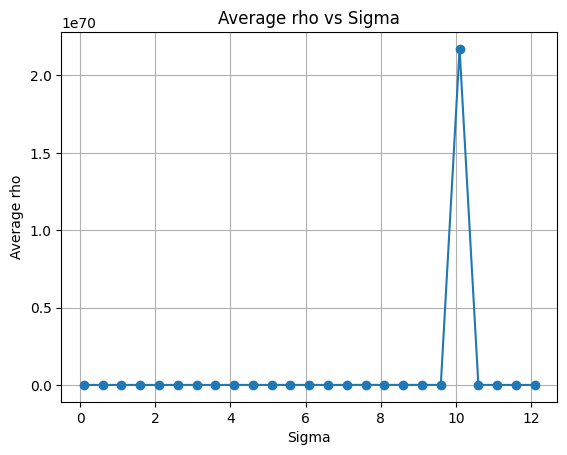

In [23]:
import networkx as nx
import numpy as np
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt

def generate_random_geometric_graph(n, radius):
    return nx.random_geometric_graph(n, radius)

def add_gaussian_weights(G, sigma):
    for u, v in G.edges():
        weight = np.random.normal(0, sigma)
        G[u][v]['weight'] = weight
    return G

def compute_laplacian_matrix(G):
    return nx.laplacian_matrix(G, weight='weight').toarray()

def compute_operator_norm(L):
    return np.linalg.norm(L, ord=2)

def compute_fiedler_value(L):
    eigenvalues, _ = eigsh(L, k=2, which='SM', maxiter=5000)
    return eigenvalues[1]

def run_experiment(n, radius, sigma, num_trials=50):
    rhos = []
    for _ in range(num_trials):
        G = generate_random_geometric_graph(n, radius)
        G = add_gaussian_weights(G, sigma)
        L = compute_laplacian_matrix(G)
        operator_norm = compute_operator_norm(L)
        fiedler_value = compute_fiedler_value(L)
        rho = (operator_norm  / fiedler_value) ** 2
        rhos.append(rho)
    return np.mean(rhos)

# Parameters
n = 20
radius = 0.3
sigma_lower = 0.1
sigma_upper = 12
sigma_step = 0.5
sigmas = np.arange(sigma_lower, sigma_upper + sigma_step, sigma_step)

# sigmas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3]
num_trials = 50

# Run experiments and collect results
average_rhos = []
for sigma in sigmas:
    avg_rho = run_experiment(n, radius, sigma, num_trials)
    average_rhos.append(avg_rho)
    print(f"Sigma: {sigma}, Average rho: {avg_rho}")

# Plot the results
plt.plot(sigmas, average_rhos, marker='o')
plt.xlabel('Sigma')
plt.ylabel('Average rho')
plt.title('Average rho vs Sigma')
plt.grid(True)
plt.show()

In [10]:
import networkx as nx
import numpy as np
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt

def generate_random_geometric_graph(n, radius):
    return nx.random_geometric_graph(n, radius)

def add_gaussian_weights(G, sigma):
    for u, v in G.edges():
        weight = np.random.normal(0, sigma)
        G[u][v]['weight'] = weight
    return G

def compute_laplacian_matrix(G):
    return nx.laplacian_matrix(G, weight='weight').toarray()

def compute_operator_norm(L):
    return np.linalg.norm(L, ord=2)

def compute_fiedler_value(L, maxiter=10000):
    try:
        eigenvalues, _ = eigsh(L, k=2, which='SM', maxiter=maxiter)
        return eigenvalues[1]
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def run_experiment(n, radius, sigma, num_trials=50, maxiter=10000):
    rhos = []
    for _ in range(num_trials):
        G = generate_random_geometric_graph(n, radius)
        G = add_gaussian_weights(G, sigma)
        L = compute_laplacian_matrix(G)
        operator_norm = compute_operator_norm(L)
        fiedler_value = compute_fiedler_value(L, maxiter)
        if fiedler_value is not None:
            rho = (operator_norm  / fiedler_value) ** 2
            rhos.append(rho)
    return np.mean(rhos) if rhos else None

# Parameters
n = 100
radius_lower = 0.1
radius_upper = 0.3
radius_step = 0.01
sigma_lower = 0.1
sigma_upper = 10
sigma_step = 0.5
num_trials = 50
maxiter = 10000

# Generate radii and sigmas
radii = np.arange(radius_lower, radius_upper + radius_step, radius_step)
sigmas = np.arange(sigma_lower, sigma_upper + sigma_step, sigma_step)

# Run experiments and collect results
results = {}
for radius in radii:
    average_rhos = []
    for sigma in sigmas:
        avg_rho = run_experiment(n, radius, sigma, num_trials, maxiter)
        if avg_rho is not None:
            average_rhos.append(avg_rho)
            print(f"Radius: {radius}, Sigma: {sigma}, Average rho: {avg_rho}")
    results[radius] = average_rhos

# Plot the results
for radius in radii:
    plt.plot(sigmas, results[radius], marker='o', label=f'Radius {radius}')
plt.xlabel('Sigma')
plt.ylabel('Average rho')
plt.title('Average rho vs Sigma for different Radii')
plt.legend()
plt.grid(True)
plt.show()

An error occurred: ARPACK error -1: No convergence (10001 iterations, 0/2 eigenvectors converged)


KeyboardInterrupt: 

/tmp/ipykernel_31873/584544528.py:40: RuntimeWarning: invalid value encountered in scalar divide
  rho = operator_norm ** 2 / fiedler_value
/tmp/ipykernel_31873/584544528.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  rho = operator_norm ** 2 / fiedler_value


Radius: 0.1, Sigma: 0.1, Average rho: nan
Radius: 0.1, Sigma: 0.6, Average rho: nan
Radius: 0.1, Sigma: 1.1, Average rho: nan
Radius: 0.1, Sigma: 1.6, Average rho: nan
Radius: 0.1, Sigma: 2.1, Average rho: nan
Radius: 0.1, Sigma: 2.6, Average rho: nan
Radius: 0.1, Sigma: 3.1, Average rho: nan
Radius: 0.1, Sigma: 3.6, Average rho: nan
Radius: 0.1, Sigma: 4.1, Average rho: nan
Radius: 0.1, Sigma: 4.6, Average rho: nan
Radius: 0.1, Sigma: 5.1, Average rho: nan
Radius: 0.1, Sigma: 5.6, Average rho: nan
Radius: 0.1, Sigma: 6.1, Average rho: nan
Radius: 0.1, Sigma: 6.6, Average rho: nan
Radius: 0.1, Sigma: 7.1, Average rho: nan
Radius: 0.1, Sigma: 7.6, Average rho: nan
Radius: 0.1, Sigma: 8.1, Average rho: nan
Radius: 0.1, Sigma: 8.6, Average rho: nan
Radius: 0.1, Sigma: 9.1, Average rho: nan
Radius: 0.1, Sigma: 9.6, Average rho: nan
Radius: 0.1, Sigma: 10.1, Average rho: nan
Radius: 0.11, Sigma: 0.1, Average rho: nan
Radius: 0.11, Sigma: 0.6, Average rho: nan
Radius: 0.11, Sigma: 1.1, Avera

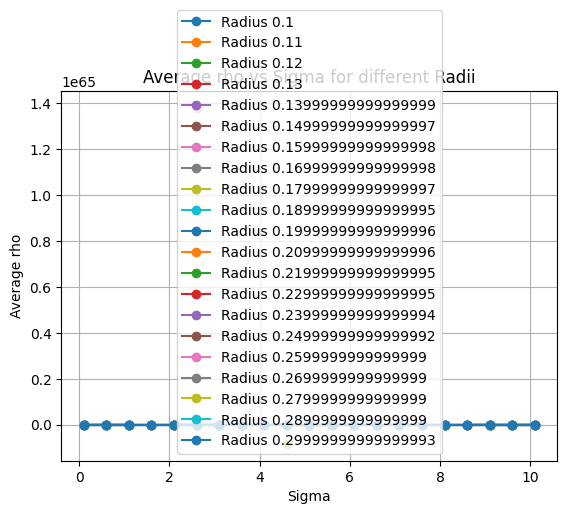

In [18]:
import networkx as nx
import numpy as np
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt

def generate_random_geometric_graph(n, radius):
    return nx.random_geometric_graph(n, radius)

def add_gaussian_weights(G, sigma):
    for u, v in G.edges():
        weight = np.random.normal(0, sigma)
        G[u][v]['weight'] = weight
    return G

def compute_laplacian_matrix(G):
    return nx.laplacian_matrix(G, weight='weight').toarray()

def compute_operator_norm(L):
    return np.linalg.norm(L, ord=2)

def compute_fiedler_value(L, maxiter=10000):
    try:
        eigenvalues, _ = eigsh(L, k=2, which='SM', maxiter=maxiter)
        return eigenvalues[1]
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def run_experiment(n, radius, sigma, num_trials=50, maxiter=10000):
    rhos = []
    for _ in range(num_trials):
        G = generate_random_geometric_graph(n, radius)
        G = add_gaussian_weights(G, sigma)
        L = compute_laplacian_matrix(G)
        operator_norm = compute_operator_norm(L)
        fiedler_value = compute_fiedler_value(L, maxiter)
        if fiedler_value is None:
            fiedler_value = compute_fiedler_value(L, maxiter * 2)  # Retry with more iterations
        if fiedler_value is not None:
            rho = (operator_norm  / fiedler_value) ** 2
            rhos.append(rho)
    return np.mean(rhos) if rhos else None

# Parameters
n = 10
radius_lower = 0.1
radius_upper = 0.3
radius_step = 0.01
sigma_lower = 0.1
sigma_upper = 10
sigma_step = 0.5
num_trials = 50
maxiter = 10000

# Generate radii and sigmas
radii = np.arange(radius_lower, radius_upper + radius_step, radius_step)
sigmas = np.arange(sigma_lower, sigma_upper + sigma_step, sigma_step)

# Run experiments and collect results
results = {}
for radius in radii:
    average_rhos = []
    for sigma in sigmas:
        avg_rho = run_experiment(n, radius, sigma, num_trials, maxiter)
        if avg_rho is not None:
            average_rhos.append(avg_rho)
            print(f"Radius: {radius}, Sigma: {sigma}, Average rho: {avg_rho}")
    results[radius] = average_rhos

# Plot the results
for radius in radii:
    plt.plot(sigmas, results[radius], marker='o', label=f'Radius {radius}')
plt.xlabel('Sigma')
plt.ylabel('Average rho')
plt.title('Average rho vs Sigma for different Radii')
plt.legend()
plt.grid(True)
plt.show()

r = 0.150, sigma = 0.100 --> Average (||E||/λ₂)² = 7.429 ± 0.925
r = 0.150, sigma = 0.621 --> Average (||E||/λ₂)² = 284.341 ± 36.123
r = 0.150, sigma = 1.142 --> Average (||E||/λ₂)² = 974.703 ± 103.256
r = 0.150, sigma = 1.663 --> Average (||E||/λ₂)² = 2096.156 ± 255.005
r = 0.150, sigma = 2.184 --> Average (||E||/λ₂)² = 3538.322 ± 405.569
r = 0.150, sigma = 2.705 --> Average (||E||/λ₂)² = 5442.622 ± 712.744
r = 0.150, sigma = 3.226 --> Average (||E||/λ₂)² = 7950.945 ± 709.324
r = 0.150, sigma = 3.747 --> Average (||E||/λ₂)² = 10632.982 ± 1258.121
r = 0.150, sigma = 4.268 --> Average (||E||/λ₂)² = 13639.197 ± 2153.427
r = 0.150, sigma = 4.789 --> Average (||E||/λ₂)² = 17387.549 ± 2715.110
r = 0.150, sigma = 5.311 --> Average (||E||/λ₂)² = 21274.568 ± 2270.730
r = 0.150, sigma = 5.832 --> Average (||E||/λ₂)² = 25249.960 ± 2908.804
r = 0.150, sigma = 6.353 --> Average (||E||/λ₂)² = 31365.784 ± 3575.593
r = 0.150, sigma = 6.874 --> Average (||E||/λ₂)² = 34708.062 ± 4327.290
r = 0.150, sig

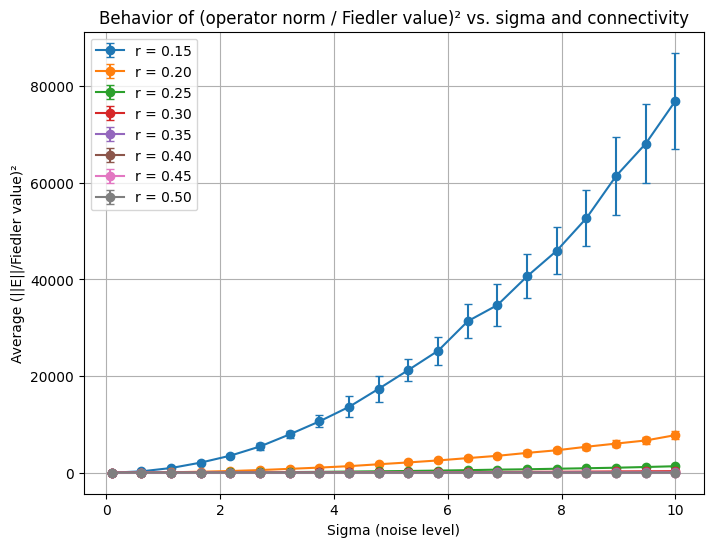

In [25]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def simulate_experiment(n, r, sigma, num_runs=50, max_attempts=500):
    """
    For a graph on n nodes with connectivity parameter r and a noise matrix scaled by sigma,
    run up to num_runs experiments (each with a connected graph) and return the average and standard
    deviation of the ratio (operator norm of E divided by the Fiedler value of L)^2.
    
    Parameters:
      n         : number of nodes in the geometric graph.
      r         : connectivity radius (nodes within distance r are connected).
      sigma     : standard deviation for generating the Gaussian noise matrix.
      num_runs  : number of successful (connected) experiments to average.
      max_attempts: maximum number of attempts to generate a connected graph.
      
    Returns:
      (mean_ratio_squared, std_ratio_squared)
    """
    ratios = []
    attempts = 0
    successes = 0
    while successes < num_runs and attempts < max_attempts:
        attempts += 1
        # Generate a random geometric graph: nodes placed uniformly in [0,1]^2.
        G = nx.random_geometric_graph(n, r)
        if not nx.is_connected(G):
            # Skip graphs that are not connected (Fiedler value would be 0).
            continue

        # Compute the (combinatorial) Laplacian of the graph.
        L = nx.laplacian_matrix(G).toarray()

        # Compute the eigenvalues. Since L is symmetric, use np.linalg.eigvalsh (which returns sorted eigenvalues).
        eigvals = np.linalg.eigvalsh(L)
        # The smallest eigenvalue is (nearly) zero, so the second smallest is the Fiedler value.
        fiedler = eigvals[1]
        # (If for some reason the Fiedler value is numerically zero, skip this trial.)
        if fiedler < 1e-10:
            continue

        # Generate a symmetric noise matrix E.
        # First, generate a full n x n matrix with i.i.d. N(0,1) entries.
        X = np.random.randn(n, n)
        # Symmetrize (so that E is self-adjoint) and scale by sigma.
        E = sigma * (X + X.T) / 2.0
        # Compute the operator (spectral) norm (largest singular value) of E.
        norm_E = np.linalg.norm(E, 2)
        
        # Compute the squared ratio (operator norm divided by Fiedler value).
        ratio_squared = (norm_E / fiedler) ** 2
        ratios.append(ratio_squared)
        successes += 1

    if successes == 0:
        return np.nan, np.nan
    else:
        return np.mean(ratios), np.std(ratios)

# ---------------------
# Parameters for the experiment:
n = 1000  # number of nodes in each graph

num_runs = 50  # number of experiments to average per parameter combination

# A range of sigma values (noise level). (For instance, from 0.1 to 2.0.)
sigma_values = np.linspace(0.1, 10.0, 20)

# A range of connectivity radii (r). For random geometric graphs, larger r means more connectivity.
r_values = np.linspace(0.15, 0.5, 8)

# Prepare arrays to store the averaged (operator norm / Fiedler)^2 values and standard deviations.
results = np.zeros((len(r_values), len(sigma_values)))
std_results = np.zeros((len(r_values), len(sigma_values)))

# Loop over connectivity (r) and sigma values.
for i, r in enumerate(r_values):
    for j, sigma in enumerate(sigma_values):
        avg_ratio2, std_ratio2 = simulate_experiment(n, r, sigma, num_runs=num_runs)
        results[i, j] = avg_ratio2
        std_results[i, j] = std_ratio2
        print(f"r = {r:.3f}, sigma = {sigma:.3f} --> Average (||E||/λ₂)² = {avg_ratio2:.3f} ± {std_ratio2:.3f}")

# ---------------------
# Plotting the results:
plt.figure(figsize=(8, 6))
for i, r in enumerate(r_values):
    plt.errorbar(sigma_values, results[i, :], yerr=std_results[i, :],
                 label=f"r = {r:.2f}", marker='o', capsize=3)

plt.xlabel("Sigma (noise level)")
plt.ylabel("Average (||E||/Fiedler value)²")
plt.title("Behavior of (operator norm / Fiedler value)² vs. sigma and connectivity")
plt.legend()
plt.grid(True)
plt.show()


# Fixed max degree

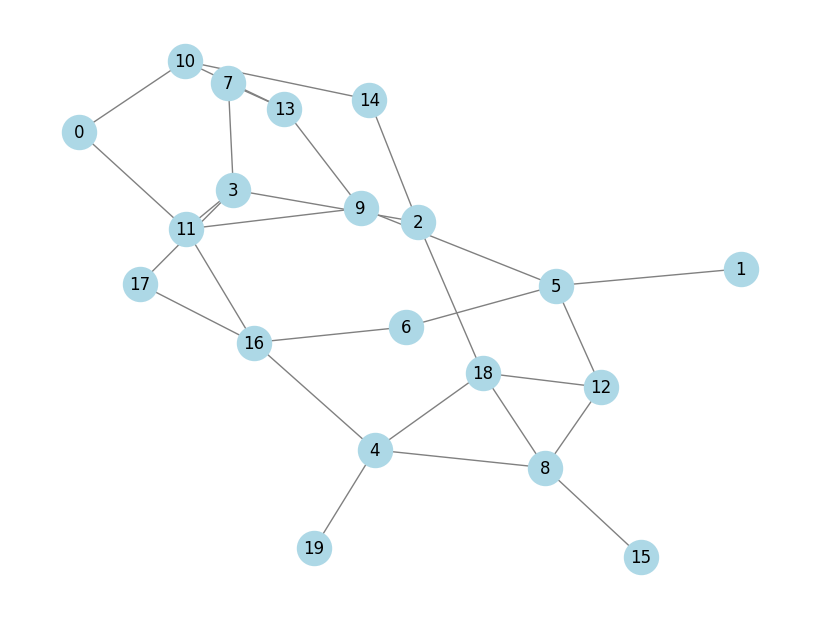

In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def generate_random_graph(n_nodes, max_degree):
    # Generate a random degree sequence that respects the max degree constraint
    degree_sequence = [random.randint(1, max_degree) for _ in range(n_nodes)]
    
    # Ensure the sum of degrees is even (required for valid graphs)
    if sum(degree_sequence) % 2 != 0:
        degree_sequence[random.randint(0, n_nodes-1)] += 1
    
    # Generate the graph
    G = nx.random_degree_sequence_graph(degree_sequence, seed=random.randint(0, 1000))
    
    return G

# Parameters
n_nodes = 20   # Number of nodes
max_degree = 4  # Maximum node degree

# Generate graph
G = generate_random_graph(n_nodes, max_degree)

# Draw graph
plt.figure(figsize=(8,6))
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray", node_size=600)
plt.show()
